# Concentration of Banking as a Property of Monopoly Capitalism: The big 7 U.S. commercial banks control 50% of consolidated assets

![](IMG_6833.JPG)

### 1)  Web scraping


##### Data Sorce
The Board of Governors of the Federal Reserve System publishes quarterly tables with the following important points for our research: 
 * Name of bank
 * Bank ID
 * Consolidated assets
Link: https://www.federalreserve.gov/releases/lbr/
<img src="data_source.PNG" alt="Image_process" width="75%" height="">

The aim of gthe web scraping stage is to identify the HTML tables, download (in a standarsized manner) this tables into CSV files , and prepare the CSV files for data cleaning for them to finalized into Pandas dataframes:


<img src="Github Media/HTML to CSV to DF.PNG" alt="Image" width="75%" height="">

#### 1a) Download all the quarterly tables of large commercial banks into HTML files

In [3]:
import requests # library to handle requests
from bs4 import BeautifulSoup # web scraping library 
import os # library to interact with the operating system
import re # regular expression library
import pandas as pd
from datetime import datetime
import pandas as pd

In [5]:
#URL of the quarterly data
url_qrtly="https://www.federalreserve.gov/releases/lbr/"

#Send a GET request to the website
response=requests.get(url_qrtly) 

#Parse the response text using BeautifulSoup
soup=BeautifulSoup(response.text,"html.parser")



In [6]:
# Find all the 'a' tags with href attributes in the HTML
all_links = soup.find_all('a', href=True)

# Filter the links based on the link text
dates= [
    "December 31, 2021",
    "September 30, 2021",
    "June 30, 2021",
    "March 31, 2021",
    "December 31, 2020",
    "September 30, 2020",
    "June 30, 2020",
    "March 31, 2020",
    "December 31, 2019",
    "September 30, 2019",
    "June 30, 2019",
    "March 31, 2019",
    "December 31, 2018",
    "September 30, 2018",
    "June 30, 2018",
    "March 31, 2018",
    "December 31, 2017",
    "September 30, 2017",
    "June 30, 2017",
    "March 31, 2017",
    "December 31, 2016",
    "September 30, 2016",
    "June 30, 2016",
    "March 31, 2016",
    "December 31, 2015",
    "September 30, 2015",
    "June 30, 2015",
    "March 31, 2015",
    "December 31, 2014",
    "September 30, 2014",
    "June 30, 2014",
    "March 31, 2014",
    "December 31, 2013",
    "September 30, 2013",
    "June 30, 2013",
    "March 31, 2013",
    "December 31, 2012",
    "September 30, 2012",
    "June 30, 2012",
    "March 31, 2012",
    "December 31, 2011",
    "September 30, 2011",
    "June 30, 2011",
    "March 31, 2011",
    "December 31, 2010",
    "September 30, 2010",
    "June 30, 2010",
    "March 31, 2010",
    "December 31, 2009",
    "September 30, 2009",
    "June 30, 2009",
    "March 31, 2009",
    "December 31, 2008",
    "September 30, 2008",
    "June 30, 2008",
    "March 31, 2008",
    "December 31, 2007",
    "September 30, 2007",
    "June 30, 2007",
    "March 31, 2007",
    "December 31, 2006",
    "September 30, 2006",
    "June 30, 2006",
    "March 31, 2006",
    "December 31, 2005",
    "September 30, 2005",
    "June 30, 2005",
    "March 31, 2005",
    "December 31, 2004",
    "September 30, 2004",
    "June 30, 2004",
    "March 31, 2004",

]

#Find all the 'a' tags with href attributes in the HTML
all_links=soup.find_all('a', href=True)

#Filter the links based on the link text
links=[link['href'] for link in all_links if link.text in dates]



In [9]:
#Create a directory to save the files:
if not os.path.exists(r"Your\Directory\Here"):
    os.makedirs(r"Your\Directory\Here")

In [23]:


def sanitize_filename(link): # removes non-alphanumeric characters from filename
    return re.sub(r'\W|/', '_', link) # replaces non-alphanumeric characters with underscores

for link in links: # loops through each link in the list of links
    table_response=requests.get(url_qrtly + link)
    filename = sanitize_filename(link) + '.html'
    filepath = f"C:\\Your\\Directory\\{filename}"
    with open(filepath, "w") as f:
        f.write(table_response.text)

#### 1b) Convert HTML files into CSV files


In [20]:
import pandas as pd
import lxml
import os
import numpy as np

In [4]:
#Define the html directory
html_dir=r"Your\Directory\Here"

#Define the csv directory
csv_dir=r"Your\Directory\Here\CSV_Folder"

#Get the list of all HTML files in the directory
html_files=os.listdir(html_dir)
html_files

['20040331_default_htm.html',
 '20040630_default_htm.html',
 '20040930_default_htm.html',
 '20041231_default_htm.html',
 '20050331_default_htm.html',
 '20050630_default_htm.html',
 '20050930_default_htm.html',
 '20051231_default_htm.html',
 '20060331_default_htm.html',
 '20060630_default_htm.html',
 '20060930_default_htm.html',
 '20061231_default_htm.html',
 '20070331_default_htm.html',
 '20070630_default_htm.html',
 '20070930_default_htm.html',
 '20071231_default_htm.html',
 '20080331_default_htm.html',
 '20080630_default_htm.html',
 '20080930_default_htm.html',
 '20081231_default_htm.html',
 '20090331_default_htm.html',
 '20090630_default_htm.html',
 '20090930_default_htm.html',
 '20091231_default_htm.html',
 '20100331_default_htm.html',
 '20100630_default_htm.html',
 '20100930_default_htm.html',
 '20101231_default_htm.html',
 '20110331_default_htm.html',
 '20110630_default_htm.html',
 '20110930_default_htm.html',
 '20111231_default_htm.html',
 '20120331_default_htm.html',
 '20120630

In [11]:
def sanitize_filename(link):
    return re.sub(r'\W|/', '_', link)

In [ ]:

#Determine the quarter and year of the filename
for html_file in html_files: 
    try:
        print(f"Processing file: {html_file}")
        year=html_file[:4]
        date=html_file[4:8]
        if date=='0331':
            quarter='_q1'
        elif date=='0630':
            quarter='_q2'
        elif date=='0930':
            quarter='_q3'
        elif date=='1231':
            quarter='_q4'
        else:
            continue #skip the file if it is not a quarter end
        #Create the CSV filename:
        csv_file=f"large_commercial_banks{quarter}_{year}.csv"
        print(f"CSV file: {csv_file}")
        html_path=os.path.join(html_dir, html_file)
        table = pd.read_html(html_path)[1]
        csv_path = os.path.join(csv_dir, csv_file)
        table.to_csv(csv_path, index=False)
    except Exception as e:
        print(f"Error processing {html_file}: {e}")


print(f"Processing file: {html_file}")

### 3) Data Cleaning

#### 3a) Uniformity of column names

In [14]:
        
#csv_file=f"large_commercial_banks{year}_{quarter}_{date}{year}.csv"

#Define the CSV file path
csv_dir=r"Your\Directory\Here\CSV_Folder"

#Get the list of CSV files in the directory
csv_files=os.listdir(csv_dir)
csv_files

['large_commercial_banks_q1_2004.csv',
 'large_commercial_banks_q1_2005.csv',
 'large_commercial_banks_q1_2006.csv',
 'large_commercial_banks_q1_2007.csv',
 'large_commercial_banks_q1_2008.csv',
 'large_commercial_banks_q1_2009.csv',
 'large_commercial_banks_q1_2010.csv',
 'large_commercial_banks_q1_2011.csv',
 'large_commercial_banks_q1_2012.csv',
 'large_commercial_banks_q1_2013.csv',
 'large_commercial_banks_q1_2014.csv',
 'large_commercial_banks_q1_2015.csv',
 'large_commercial_banks_q1_2016.csv',
 'large_commercial_banks_q1_2017.csv',
 'large_commercial_banks_q1_2018.csv',
 'large_commercial_banks_q1_2019.csv',
 'large_commercial_banks_q1_2020.csv',
 'large_commercial_banks_q1_2021.csv',
 'large_commercial_banks_q1_2022.csv',
 'large_commercial_banks_q1_2023.csv',
 'large_commercial_banks_q2_2004.csv',
 'large_commercial_banks_q2_2005.csv',
 'large_commercial_banks_q2_2006.csv',
 'large_commercial_banks_q2_2007.csv',
 'large_commercial_banks_q2_2008.csv',
 'large_commercial_banks_

In [22]:
#Define the uniform column names
uniform_columns= [
    'Name',
    'Natl Rank',
    'Bank ID',
    'Bank Location',
    'Charter',
    'Consolidated Assets',
    'Domestic Assets',
    'Percentage Domestic Assets',
    'Percentage Cumulative Assets',
    'Domestic Branches',
    'Foreign Branches',
    'IBF',
    'Percentage Foreign Owned',
]

#Loop through each CSV file and append to the uniform_columns
for csv_file in csv_files:
    try:
        #construct the full path to the CSV file
        csv_path=os.path.join(csv_dir,csv_file)

        #Read the CSV file into a Dataframe
        df=pd.read_csv(csv_path)

        #Check if the DataFrame has the same number of columns as 'uniform_columns'
        if len(df.columns) < len(uniform_columns):
            #Add the missing columns and fill them with NaN
            missing_cols=len(uniform_columns)-len(df.columns)
            for _ in range(missing_cols):
                df[uniform_columns[-missing_cols]]=np.nan

        #Read the columns
        df.columns=uniform_columns

        #Write the DataFrame back to the CSV file
        df.to_csv(csv_path,index=False)

        print(f"Successfully converted {csv_file}")
    except Exception as e:
        print(f"Error converting {csv_file}: {e}") 

Successfully converted large_commercial_banks_q1_2004.csv
Successfully converted large_commercial_banks_q1_2005.csv
Successfully converted large_commercial_banks_q1_2006.csv
Successfully converted large_commercial_banks_q1_2007.csv
Successfully converted large_commercial_banks_q1_2008.csv
Successfully converted large_commercial_banks_q1_2009.csv
Successfully converted large_commercial_banks_q1_2010.csv
Successfully converted large_commercial_banks_q1_2011.csv
Successfully converted large_commercial_banks_q1_2012.csv
Successfully converted large_commercial_banks_q1_2013.csv
Successfully converted large_commercial_banks_q1_2014.csv
Successfully converted large_commercial_banks_q1_2015.csv
Successfully converted large_commercial_banks_q1_2016.csv
Successfully converted large_commercial_banks_q1_2017.csv
Successfully converted large_commercial_banks_q1_2018.csv
Successfully converted large_commercial_banks_q1_2019.csv
Successfully converted large_commercial_banks_q1_2020.csv
Successfully c

#### 3b) Change datatypes for columns and add new columns


In [27]:
#Define the columns to covnert the integer
integer_columns=['Natl Rank', 'Consolidated Assets', 'Domestic Assets', 'Domestic Branches', 'Foreign Branches']

#Define the columns to convert to floats
float_columns=['Percentage Domestic Assets', 'Percentage Cumulative Assets', 'Percentage Foreign Owned']

for csv_file in csv_files:
    try:
        print(f"Processing file: {csv_file}")
        csv_path=os.path.join(csv_dir,csv_file)
        df=pd.read_csv(csv_path)

        #Convert to float columns
        for col in integer_columns:
            df[col]=pd.to_numeric(df[col],errors='coerce').fillna(0).astype(float)

        #Mutiply 'Consolidated Assets' and 'Domestic Assets' by 1,000,000
        df['Consolidated Assets']=df['Consolidated Assets'] #*1000000 use to multiply the 'Consolidated Assets', 'Domestic Assets' columns
        df['Domestic Assets']=df['Domestic Assets'] #*1000000 use to multiply the 'Consolidated Assets', 'Domestic Assets' columns

        #Convert float columns and divide by 100 to get decimal representation
        for col in float_columns:
            df[col]=pd.to_numeric(df[col],errors='coerce') #.div(100) use to divide 'Percentage Domestic Assets', 'Percentage Cumulative Assets', 'Percentage Foreign Owned'columns

        #Save the cleaned DataFrame back to the CSV file
        df.to_csv(csv_path,index=False)

        print(f"Successfully cleaned file: {csv_file}")
    except Exception as e:
        print(f"Error processing file: {csv_file}: {e}")
         



Processing file: large_commercial_banks_q1_2004.csv
Successfully cleaned file: large_commercial_banks_q1_2004.csv
Processing file: large_commercial_banks_q1_2005.csv
Successfully cleaned file: large_commercial_banks_q1_2005.csv
Processing file: large_commercial_banks_q1_2006.csv
Successfully cleaned file: large_commercial_banks_q1_2006.csv
Processing file: large_commercial_banks_q1_2007.csv
Successfully cleaned file: large_commercial_banks_q1_2007.csv
Processing file: large_commercial_banks_q1_2008.csv
Successfully cleaned file: large_commercial_banks_q1_2008.csv
Processing file: large_commercial_banks_q1_2009.csv
Successfully cleaned file: large_commercial_banks_q1_2009.csv
Processing file: large_commercial_banks_q1_2010.csv
Successfully cleaned file: large_commercial_banks_q1_2010.csv
Processing file: large_commercial_banks_q1_2011.csv
Successfully cleaned file: large_commercial_banks_q1_2011.csv
Processing file: large_commercial_banks_q1_2012.csv
Successfully cleaned file: large_com

Create another column in each one of the csv files that would allow me to see the percentage of the consolidated assets of each bank compared to the sum of the consolidated assets of all banks

In [29]:

#Get the list of all CSV files in the directory
csv_files = os.listdir(csv_dir)


#Loop through all the CSV files:
for csv_file in csv_files:
    csv_path=os.path.join(csv_dir,csv_file)
    df=pd.read_csv(csv_path)

    #Calculate tthe sum of consolidated assets for each bank
    total_assets=df['Consolidated Assets'].sum()

    #Calculate the percentage of consolidated assets for each bank
    df['Percentage of Total Cosolidated Assets']=(df['Consolidated Assets']/total_assets)

    # Save the updated dataframe back to the CSV file
    df.to_csv(csv_path,index=False)



Percentage of consolidated assets calculated for all CSV files.


Adding a date and column

In [38]:
#Extract quater from filename
csv_files=os.listdir(csv_dir)

all_data=[]

for csv_file in csv_files:
    #Extract quarter and year from filename but exclude the extension
    quarter_year = csv_file.split('_')[3:5]
    quarter=quarter_year[0]
    year=quarter_year[1].split('.')[0]

    #Create 'Quarter' column value
    quarter_column=quarter.replace('_','-')+'-'+year

    #Create 'Date' column value
    if quarter == 'q1':
        month_day = '03/31'
    elif quarter == 'q2':
        month_day = '06/30'
    elif quarter == 'q3':
        month_day = '09/30'
    elif quarter == 'q4':
        month_day = '12/31'
    else:
        print(f"Unexpected quarter value format in file: {csv_file}") #Print out any problematic files
    date_column=datetime.strptime(month_day+'/'+year,'%m/%d/%Y')

    #Read in the data
    df=pd.read_csv(os.path.join(csv_dir,csv_file))

    #Add the quarter and year column
    df['Quater']=quarter_column
    df['Date']=date_column

    #Write the DataFrame with the new columns back to the CSV file:
    df.to_csv(os.path.join(csv_dir,csv_file),index=False)

    all_data.append(df) #Append the data to the list



#### 3c) Creating a concatenated single dataframe with all data points for all CSV files from 2003-2023

In [ ]:
# Concatenate all data into a single DataFrame
all_data_df = pd.concat(all_data, ignore_index=True)

#Write the dataframe into a csv file
all_data_df.to_csv("all_data.csv",index=False)

Create a 'Bank Name' column stardardizes the names of all banks according to the Bank ID to prevent the repetition of bank names in different string forms 

In [44]:
#Sort the dataframe by 'Date' in the descending order
all_data_df=all_data_df.sort_values('Date',ascending=False)

#Group by 'Bank ID' and get the first 'Name' for each group
bank_names=all_data_df.groupby('Bank ID')['Name'].first()

#Map the 'Bank ID' column to the bank_names series to create the new 'Bank Name' column
all_data_df['Bank Name']=all_data_df['Bank ID'].map(bank_names)

all_data_df.to_csv('all_data_standardized.csv',index=False)

all_data_df


,Name,Natl Rank,Bank ID,Bank Location,Charter,Consolidated Assets,Domestic Assets,Percentage Domestic Assets,Percentage Cumulative Assets,Domestic Branches,Foreign Branches,IBF,Percentage Foreign Owned,Percentage of Total Cosolidated Assets,Quater,Date,Bank Name
33487,BANK OF AMER NA/BANK OF AMER CORP,2.0,480228,"CHARLOTTE, NC",NAT,2.518290e+12,2.392162e+12,0.95,0.27,3804.0,24.0,Y,NaN,0.115448,q1-2023,2023-03-31,BANK OF AMER NA/BANK OF AMER CORP
34900,BANK OF BARTLETT/WEST TENNESSEE BSHRS,1406.0,225559,"BARTLETT, TN",SMB,5.360000e+08,5.360000e+08,1.00,0.99,6.0,0.0,N,NaN,0.000025,q1-2023,2023-03-31,BANK OF BARTLETT/WEST TENNESSEE BSHRS
34915,DEMOTTE ST BK/DEMOTTE BC,1421.0,539340,"DEMOTTE, IN",SMB,5.300000e+08,5.300000e+08,1.00,0.99,10.0,0.0,N,NaN,0.000024,q1-2023,2023-03-31,DEMOTTE ST BK/DEMOTTE BC
34914,PEOPLES B&TC/PEOPLES BANKTRUST,1420.0,109136,"BUFORD, GA",SNM,5.300000e+08,5.300000e+08,1.00,0.99,0.0,0.0,N,NaN,0.000024,q1-2023,2023-03-31,PEOPLES B&TC/PEOPLES BANKTRUST
34913,SAVINGS BK/SAVINGS BC,1419.0,578116,"CIRCLEVILLE, OH",SNM,5.310000e+08,5.310000e+08,1.00,0.99,6.0,0.0,N,NaN,0.000024,q1-2023,2023-03-31,SAVINGS BK/SAVINGS BC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69688,MOUNTAINBANK/MOUNTAINBANK FC,456.0,2586740,"HENDERSONVILLE, NC",SNM,8.780000e+08,8.780000e+08,1.00,0.93,13.0,0.0,N,0.0,0.000132,q3-2003,2003-09-30,MOUNTAINBANK/MOUNTAINBANK FC
69687,FRANKLIN NB/FRANKLIN FC,455.0,1408069,"FRANKLIN, TN",NAT,8.780000e+08,8.780000e+08,1.00,0.93,10.0,0.0,N,0.0,0.000132,q3-2003,2003-09-30,FIFTH THIRD BK/FIFTH THIRD BC
69921,FIRST BK RICHMOND NA/FIRST MUTUAL RICHMOND,688.0,419675,"RICHMOND, IN",NAT,5.680000e+08,5.680000e+08,1.00,0.96,4.0,0.0,N,0.0,0.000085,q3-2003,2003-09-30,FIRST BK RICHMOND/RICHMOND MUT BC
69685,PALMETTO BK/PALMETTO BSHRS,453.0,862824,"LAURENS, SC",SNM,8.820000e+08,8.820000e+08,1.00,0.93,33.0,0.0,N,0.0,0.000132,q3-2003,2003-09-30,PALMETTO BK/CAPGEN CAP GRP V LLC


### 4) Exploratory Data Analysis

#### Research Questions:
* What is the current market share of banks manifested through the consolidated assets of banks in the U.S.?

* What is the historical (2003-2023) trend of monopolization/dispersion/equilibrium of banking in the U.S.? 




#### 4a) Creating a pivot dataframe on the 7 Big commercial banks based on consolidated assets 


In [5]:
#Load the CSV file into a DataFrame
df=pd.read_csv('all_data_standardized.csv')
#Display the first few rows of the dataframe 
df.head()

,Name,Natl Rank,Bank ID,Bank Location,Charter,Consolidated Assets,Domestic Assets,Percentage Domestic Assets,Percentage Cumulative Assets,Domestic Branches,Foreign Branches,IBF,Percentage Foreign Owned,Percentage of Total Consolidated Assets,Quarter,Date,Bank Name
0,BANK OF AMER NA/BANK OF AMER CORP,2,480228,"CHARLOTTE, NC",NAT,2.518290e+12,2.392160e+12,0.95,0.27,3804,24,Y,NaN,0.115448,q1-2023,3/31/2023,BANK OF AMER NA/BANK OF AMER CORP
1,BANK OF BARTLETT/WEST TENNESSEE BSHRS,1406,225559,"BARTLETT, TN",SMB,5.360000e+08,5.360000e+08,1.00,0.99,6,0,N,NaN,0.000025,q1-2023,3/31/2023,BANK OF BARTLETT/WEST TENNESSEE BSHRS
2,DEMOTTE ST BK/DEMOTTE BC,1421,539340,"DEMOTTE, IN",SMB,5.300000e+08,5.300000e+08,1.00,0.99,10,0,N,NaN,0.000024,q1-2023,3/31/2023,DEMOTTE ST BK/DEMOTTE BC
3,PEOPLES B&TC/PEOPLES BANKTRUST,1420,109136,"BUFORD, GA",SNM,5.300000e+08,5.300000e+08,1.00,0.99,0,0,N,NaN,0.000024,q1-2023,3/31/2023,PEOPLES B&TC/PEOPLES BANKTRUST
4,SAVINGS BK/SAVINGS BC,1419,578116,"CIRCLEVILLE, OH",SNM,5.310000e+08,5.310000e+08,1.00,0.99,6,0,N,NaN,0.000024,q1-2023,3/31/2023,SAVINGS BK/SAVINGS BC


In [28]:
#Filter the DataFrame to only include the big seven bank, including their consolidated assets for each quarter
big_seven_banks={
    'JPMORGAN CHASE BK NA/JPMORGAN CHASE & CO': 852218,
    'BANK OF AMER NA/BANK OF AMER CORP': 480228,
    'CITIBANK NA/CITIGROUP': 476810,
    'WELLS FARGO BK NA/WELLS FARGO & CO': 451965,
    'U S BK NA/U S BC': 504713,
    'TRUIST BK/TRUIST FC': 852320,
    'PNC BK NA/PNC FNCL SVC GROUP': 817824}

#Filter the DataFrame to only include the big seven banks
filtered_df=df[df['Bank ID'].isin(big_seven_banks.values())]

#Display the 'filtered_df' DataFrame
filtered_df


,Name,Natl Rank,Bank ID,Bank Location,Charter,Consolidated Assets,Domestic Assets,Percentage Domestic Assets,Percentage Cumulative Assets,Domestic Branches,Foreign Branches,IBF,Percentage Foreign Owned,Percentage of Total Cosolidated Assets,Quater,Date,Bank Name
0,BANK OF AMER NA/BANK OF AMER CORP,2.0,480228,"CHARLOTTE, NC",NAT,2.518290e+12,2.392162e+12,0.95,0.27,3804.0,24.0,Y,NaN,0.115448,q1-2023,2023-03-31,BANK OF AMER NA/BANK OF AMER CORP
711,JPMORGAN CHASE BK NA/JPMORGAN CHASE & CO,1.0,852218,"COLUMBUS, OH",NAT,3.267963e+12,2.511821e+12,0.77,0.15,4788.0,32.0,Y,NaN,0.149815,q1-2023,2023-03-31,JPMORGAN CHASE BK NA/JPMORGAN CHASE & CO
1426,PNC BK NA/PNC FNCL SVC GROUP,7.0,817824,"WILMINGTON, DE",NAT,5.563140e+11,5.543650e+11,1.00,0.50,2556.0,1.0,N,NaN,0.025503,q1-2023,2023-03-31,PNC BK NA/PNC FNCL SVC GROUP
1427,TRUIST BK/TRUIST FC,6.0,852320,"CHARLOTTE, NC",SNM,5.648370e+11,5.647720e+11,1.00,0.47,2006.0,0.0,N,NaN,0.025894,q1-2023,2023-03-31,TRUIST BK/TRUIST FC
1428,U S BK NA/U S BC,5.0,504713,"CINCINNATI, OH",NAT,5.904600e+11,5.807350e+11,0.98,0.45,2207.0,1.0,N,NaN,0.027069,q1-2023,2023-03-31,U S BK NA/U S BC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139287,CITIBANK NA/CITIGROUP,3.0,476810,"NEW YORK, NY",NAT,5.545400e+11,2.467820e+11,0.45,0.27,388.0,364.0,Y,0.0,0.083206,q3-2003,2003-09-30,CITIBANK NA/CITIGROUP
139288,BRANCH BKG&TC/BB&T CORP,16.0,852320,"WINSTON-SALEM, NC",SNM,6.415700e+10,6.415700e+10,1.00,0.54,804.0,0.0,N,0.0,0.009626,q3-2003,2003-09-30,TRUIST BK/TRUIST FC
139290,PNC BK NA/PNC FNCL SVC GROUP,14.0,817824,"PITTSBURGH, PA",NAT,6.516700e+10,6.393200e+10,0.98,0.52,828.0,0.0,Y,0.0,0.009778,q3-2003,2003-09-30,PNC BK NA/PNC FNCL SVC GROUP
139296,U S BK NA/U S BC,8.0,504713,"CINCINNATI, OH",NAT,1.864640e+11,1.864640e+11,1.00,0.45,2518.0,1.0,N,0.0,0.027978,q3-2003,2003-09-30,U S BK NA/U S BC


In [39]:
#Pivot the DataFrame
pivot_df_date=filtered_df.pivot(index='Date',columns='Name',values='Consolidated Assets')

#Renaming and summing the columns
pivot_df_date['TRUIST BK/TRUIST FC']= pivot_df_date['TRUIST BK/TRUIST FC'].add(pivot_df_date['BRANCH BKG&TC/BB&T CORP'],fill_value=0)
pivot_df_date['JPMORGAN CHASE BK NA/JPMORGAN CHASE & CO']=pivot_df_date['JPMORGAN CHASE BK NA/JPMORGAN CHASE & CO'].add(pivot_df_date['JPMORGAN CHASE BK/J P MORGAN CHASE & CO'], fill_value=0)

#Remove the old columns
pivot_df_date.drop(columns=['BRANCH BKG&TC/BB&T CORP', 'JPMORGAN CHASE BK/J P MORGAN CHASE & CO'],inplace=True, errors='ignore')


In [40]:
#Confirming the pivot table type
print(type(pivot_df_date))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
#Select only the specified banks
pivot_df_date=pivot_df_date[list(big_seven_banks.keys())]

#Sort data by date
pivot_df_date.sort_index(inplace=True)

#Display filtered and cleaned data
pivot_df_date.head()

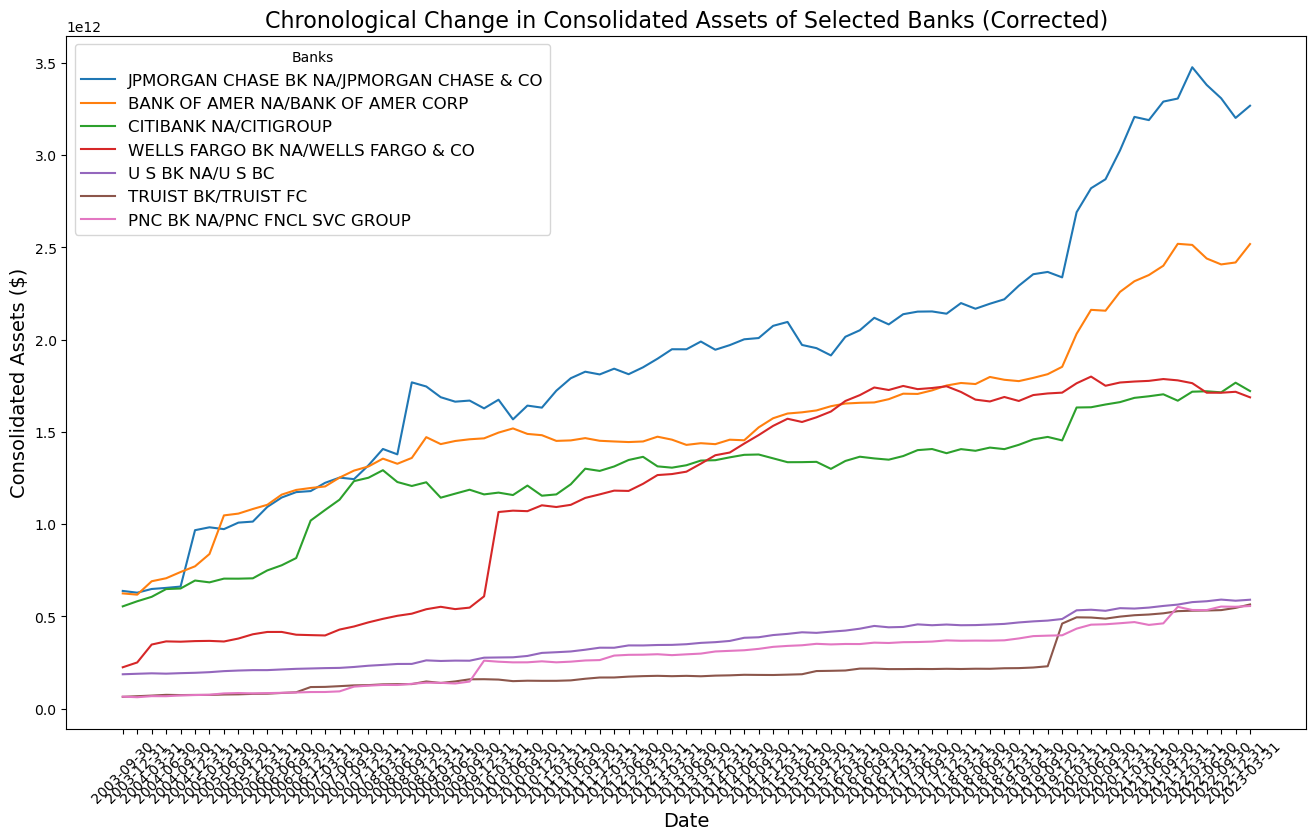

In [43]:
#Plotting the data for trend analysis

import seaborn as sns #Advanced plotting library
import matplotlib.pyplot as plt #Basic plotting library

# Now let's replot the data using the corrected Date-based index with Seaborn
plt.figure(figsize=(16, 9))
for bank in big_seven_banks.keys():
    sns.lineplot(data=pivot_df_date, x=pivot_df_date.index, y=bank, label=bank)

# Add title and labels
plt.title('Chronological Change in Consolidated Assets of Selected Banks (Corrected)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Consolidated Assets ($)', fontsize=14)
plt.legend(title='Banks', fontsize=12)
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [46]:
#Creating a dataframe that holds unique pairs of "Date" and "Quarter""Bank Acquisitions"
date_quarter_mapping=df[['Date','Quater']].drop_duplicates()

#Reset the index of your pivoted dataframe so that "Date" becomes a regular column
pivot_df_date.reset_index(inplace=True)

#Merge the "Quarter" information into pivot_df_date
pivot_df_date=pd.merge(pivot_df_date,date_quarter_mapping,on='Date',how='left')

In [89]:
#Adding the "Percentage of Total Consolidated Assets" column

#Calculate the total assets for each quarter across all banks
total_assets_by_date=df.groupby('Date')['Consolidated Assets'].sum()

#Calculate the total assets of each quarter for the seven big banks:
total_big_seven_assets_by_date=filtered_df.groupby('Date')['Consolidated Assets'].sum()

#Calculate the percentage for each quarter
percentage_by_date=(total_big_seven_assets_by_date/total_assets_by_date)*100

#Merge this percentage to the 'pivot_df_date' dataframe. 
pivot_df_date["Share of Consolidated Assets"]=pivot_df_date['Date'].map(percentage_by_date)

#Merge the total assets for each quarter accross all banks to the 'pivot_df_date' dataframe:
pivot_df_date['Total Consolidated Assets']=pivot_df_date['Date'].map(total_assets_by_date)

#Merge the summed total assets for each quarter for the seven big banks to the 'pivot_df_date' dataframe:
pivot_df_date['Big 7 Total Consolidated Assets']=pivot_df_date['Date'].map(total_big_seven_assets_by_date)

#Display the dataframe
pivot_df_date.head()

,Date,Chase,Bank of America,Citibank,Wells Fargo,US Bank,Truist Bank,PNC,Quarter,Share of Consolidated Assets,Total Consolidated Assets,Total Consolidated Assets of the Big 7,Big 7 Total Consolidated Assets
0,2003-09-30,6.381200e+11,6.247230e+11,5.545400e+11,2.243760e+11,1.864640e+11,6.415700e+10,6.516700e+10,q3-2003,35.373826,6.664665e+12,2.357547e+12,2.357547e+12
1,2003-12-31,6.286620e+11,6.179620e+11,5.821230e+11,2.504740e+11,1.891590e+11,6.758400e+10,6.203700e+10,q4-2003,35.400424,6.773933e+12,2.398001e+12,2.398001e+12
2,2004-03-31,6.486920e+11,6.905730e+11,6.061910e+11,3.475600e+11,1.916060e+11,7.084000e+10,6.782200e+10,q1-2004,37.571255,6.982157e+12,2.623284e+12,2.623284e+12
3,2004-06-30,6.546410e+11,7.068880e+11,6.482430e+11,3.646980e+11,1.897370e+11,7.489000e+10,6.752700e+10,q2-2004,37.473724,7.222725e+12,2.706624e+12,2.706624e+12
4,2004-09-30,6.617720e+11,7.406950e+11,6.513450e+11,3.629730e+11,1.924530e+11,7.370000e+10,7.175300e+10,q3-2004,37.167262,7.411606e+12,2.754691e+12,2.754691e+12


In [ ]:
#Changing the name of the Big 7 banks to their commercial names:

name_mapping={
    'JPMORGAN CHASE BK NA/JPMORGAN CHASE & CO': 'Chase',
    'BANK OF AMER NA/BANK OF AMER CORP': 'Bank of America',
    'CITIBANK NA/CITIGROUP': 'Citibank',
    'WELLS FARGO BK NA/WELLS FARGO & CO': 'Wells Fargo',
    'U S BK NA/U S BC': 'US Bank',
    'TRUIST BK/TRUIST FC': 'Truist Bank',
    'PNC BK NA/PNC FNCL SVC GROUP': 'PNC'
}

#Use the 'rename' method to rename the columns
pivot_df_date.rename(columns=name_mapping,inplace=True)

#Correct type in quarter column name from 'Quater' to 'Quarter'
pivot_df_date.rename(columns={'Quater': 'Quarter'}, inplace=True)

pivot_df_date

In [74]:
#Download 'pivot_df_date' dataframe into a CSV file
pivot_df_date.to_csv('pivot_df_big_seven_banks_Updated_9-7-2023.csv',index=False)

#### 4b) Creating a pivot dataframe on the percentage of the market share of the 7 Big commercial banks vs. the rest of the large commercial banks based on consolidated assets

In [6]:
#Load dataset
all_data_stardardized=pd.read_csv('all_data_standardized.csv')

#Change the name of column 'Quater' to 'Quarter'
all_data_stardardized.rename(columns={'Quater':'Quarter'},inplace=True)


#Display the first few rows of the dataframe
all_data_stardardized.head()

,Name,Natl Rank,Bank ID,Bank Location,Charter,Consolidated Assets,Domestic Assets,Percentage Domestic Assets,Percentage Cumulative Assets,Domestic Branches,Foreign Branches,IBF,Percentage Foreign Owned,Percentage of Total Consolidated Assets,Quarter,Date,Bank Name
0,BANK OF AMER NA/BANK OF AMER CORP,2,480228,"CHARLOTTE, NC",NAT,2.518290e+12,2.392160e+12,0.95,0.27,3804,24,Y,NaN,0.115448,q1-2023,3/31/2023,BANK OF AMER NA/BANK OF AMER CORP
1,BANK OF BARTLETT/WEST TENNESSEE BSHRS,1406,225559,"BARTLETT, TN",SMB,5.360000e+08,5.360000e+08,1.00,0.99,6,0,N,NaN,0.000025,q1-2023,3/31/2023,BANK OF BARTLETT/WEST TENNESSEE BSHRS
2,DEMOTTE ST BK/DEMOTTE BC,1421,539340,"DEMOTTE, IN",SMB,5.300000e+08,5.300000e+08,1.00,0.99,10,0,N,NaN,0.000024,q1-2023,3/31/2023,DEMOTTE ST BK/DEMOTTE BC
3,PEOPLES B&TC/PEOPLES BANKTRUST,1420,109136,"BUFORD, GA",SNM,5.300000e+08,5.300000e+08,1.00,0.99,0,0,N,NaN,0.000024,q1-2023,3/31/2023,PEOPLES B&TC/PEOPLES BANKTRUST
4,SAVINGS BK/SAVINGS BC,1419,578116,"CIRCLEVILLE, OH",SNM,5.310000e+08,5.310000e+08,1.00,0.99,6,0,N,NaN,0.000024,q1-2023,3/31/2023,SAVINGS BK/SAVINGS BC


In [455]:
#Merging pecentages for Chase and Truist

def merge_banks(df):
    if 'TRUIST BK/TRUIST FC' in df.columns and 'BRANCH BKG&TC/BB&T CORP' in df.columns:
        df['TRUIST BK/TRUIST FC']=df['TRUIST BK/TRUIST FC'].add(df['BRANCH BKG&TC/BB&T CORP'],fill_value=0)
        df.drop('BRANCH BKG&TC/BB&T CORP',axis=1,inplace=True)

    if 'JPMORGAN CHASE BK NA/JPMORGAN CHASE & CO' in df.columns and 'JPMORGAN CHASE BK/J P MORGAN CHASE & CO' in df.columns:
        df['JPMORGAN CHASE BK NA/JPMORGAN CHASE & CO'] = df['JPMORGAN CHASE BK NA/JPMORGAN CHASE & CO'].add(df['JPMORGAN CHASE BK/J P MORGAN CHASE & CO'], fill_value=0)
        df.drop('JPMORGAN CHASE BK/J P MORGAN CHASE & CO', axis=1, inplace=True)

    return df

#Create the pivot table
pivot_percentage_assets_df=all_data_stardardized.pivot_table(index=['Date','Quarter'],values='Percentage of Total Consolidated Assets',columns='Name',aggfunc=sum).reset_index()

# Convert 'Date' column to datetime type
pivot_percentage_assets_df['Date']=pd.to_datetime(pivot_percentage_assets_df['Date'])

#Sort dataframe based on the 'Date' column
pivot_percentage_assets_df.sort_values('Date',ascending=True,inplace=True)

#Merge the banks in the pivot table
pivot_percentage_assets_df=merge_banks(pivot_percentage_assets_df)

#Display the first few rows of the dataframe
pivot_percentage_assets_df.head()

Name,Date,Quarter,1880 BK/DELMARVA BSHRS,1ST BK NA/FIRST NAT BSHRS HEMPSTEAD CTY,1ST BK NA/MAGNOLIA BKG CORP,1ST BK YUMA/WESTERN AZ BC,1ST BK/GLACIER BC,1ST CAP BK/,1ST CAP BK/1ST CAP BC,1ST CENTENNIAL BK/1ST CENTENNIAL BC,...,YARDVILLE NB/PNC FNCL SVC GROUP,YARDVILLE NB/YARDVILLE NAT BC,YELLOWSTONE BK/YELLOWSTONE HC,YORK TRADITIONS BK/,YOUR CMNTY BK/COMMUNITY BK SHARES,YOUR CMNTY BK/COMMUNITY BK SHARES OF IN,YOUR CMNTY BK/YOUR CMNTY BSHRS,ZB NA/ZIONS BC,ZIONS BC NA/,ZIONS FIRST NB/ZIONS BC
59,2003-09-30,q3-2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001541
0,2003-12-31,q4-2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000358,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001572
20,2004-03-31,q1-2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000368,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001674
40,2004-06-30,q2-2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000046,...,NaN,0.000367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001638
60,2004-09-30,q3-2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000048,...,NaN,0.000371,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001519


In [159]:
#Mapping the original bank names to their commercial names:
name_mapping = {
    'JPMORGAN CHASE BK NA/JPMORGAN CHASE & CO': 'Chase',
    'BANK OF AMER NA/BANK OF AMER CORP': 'Bank of America',
    'CITIBANK NA/CITIGROUP': 'Citibank',
    'WELLS FARGO BK NA/WELLS FARGO & CO': 'Wells Fargo',
    'U S BK NA/U S BC': 'US Bank',
    'TRUIST BK/TRUIST FC': 'Truist Bank',
    'PNC BK NA/PNC FNCL SVC GROUP': 'PNC'
}

# Rename the columns of the pivot table using the name mapping dictionary
pivot_percentage_assets_df=pivot_percentage_assets_df.rename(columns=name_mapping)

In [452]:

#Create a column that sums the percentage of all other banks

#list of Big 7 banks:
big_seven_banks=['Chase', 'Bank of America', 'Citibank', 'Wells Fargo', 'US Bank', 'Truist Bank', 'PNC']

#Calculate the sum of the Big 7 banks percentages for aach date
pivot_percentage_assets_df['Big 7']=pivot_percentage_assets_df[big_seven_banks].sum(axis=1)

#Calculate the sum of the 'Other Banks' column as the difference between 100% and the sum of the Big 7 banks
pivot_percentage_assets_df['Other Banks']=1-pivot_percentage_assets_df['Big 7']

#Add the 'Other Banks' and 'Big 7' as a column to the dataframe
pivot_percentage_assets_df=pivot_percentage_assets_df[['Date','Quarter']+big_seven_banks+['Other Banks','Big 7']]

pivot_percentage_assets_df

Name,Date,Quarter,Chase,Bank of America,Citibank,Wells Fargo,US Bank,Truist Bank,PNC,Other Banks,Big 7
59,2003-09-30,q3-2003,0.095747,0.093737,0.083206,0.033667,0.027978,0.009626,0.009778,0.646262,0.353738
0,2003-12-31,q4-2003,0.092806,0.091226,0.085936,0.036976,0.027925,0.009977,0.009158,0.645996,0.354004
20,2004-03-31,q1-2004,0.092907,0.098905,0.086820,0.049778,0.027442,0.010146,0.009714,0.624287,0.375713
40,2004-06-30,q2-2004,0.090636,0.097870,0.089750,0.050493,0.026269,0.010369,0.009349,0.625263,0.374737
60,2004-09-30,q3-2004,0.089289,0.099937,0.087882,0.048974,0.025966,0.009944,0.009681,0.628327,0.371673
...,...,...,...,...,...,...,...,...,...,...,...
38,2022-03-31,q1-2022,0.158724,0.114756,0.078433,0.080545,0.026367,0.024244,0.024420,0.492510,0.507490
58,2022-06-30,q2-2022,0.156061,0.112633,0.079410,0.079052,0.026877,0.024561,0.024666,0.496740,0.503260
78,2022-09-30,q3-2022,0.153040,0.111379,0.079304,0.079210,0.027347,0.024709,0.025598,0.499413,0.500587
19,2022-12-31,q4-2022,0.147578,0.111469,0.081430,0.079161,0.026969,0.025176,0.025456,0.502760,0.497240


In [164]:
#Download 'pivot_df_date' dataframe into a CSV file
pivot_percentage_assets_df.to_csv('market_share_prc_cons_assets.csv',index=False)

#### 4c) Creating a dataframe for a treemap plotly with a parent category for the 7 Big banks

In [7]:

#Load the dataset
treemap_df=pd.read_excel('treemap_df_assets.xlsx')

#Display the first few rows of the dataframe
treemap_df

,Parent,Bank,Consolidated Assets
0,7 Big,Chase (14.98%),3267963000000
1,7 Big,Bank of America (11.54%),2518290000000
2,7 Big,Citibank (7.89%),1721547000000
3,7 Big,Wells Fargo (7.74%),1687507000000
4,7 Big,US Bank (2.71%),590460000000
5,7 Big,Truist Bank (2.59%),564837000000
6,7 Big,PNC (2.55%),556314000000
7,Other Banks (50%),NaN,10906359000000


### 5) Data Visualization

#### 5a) Plotting the linear progression of the consolidated assets of the Big 7 commerical banks

In [207]:
#Importing necessary visualization libraries
import plotly as py
import plotly.express as px
from sjvisualizer import Canvas #Canvas serves as a material base upon whihc your visualizations are built.
from sjvisualizer import DataHandler #DataHandler is a class that helps you to load data from various sources.
from sjvisualizer import PieRace #Helps with creating an animate pie chart
import time #Time related functions
import json #JSON related functions
from chart_studio import tools #For uploading plots to Plotly Chart Studio
import chart_studio.plotly as py


In [311]:
#Linear plotting of the Big 7 banks consolidated assets per quarter
fig_linear_big7=px.line(pivot_df_date,
                        x='Quarter',
                        y=['Chase', 'Bank of America', 'Citibank', 'Wells Fargo', 'US Bank', 'Truist Bank', 'PNC'],
                        title='Consolidated Assets of the Big 7 Commercial Banks',
                        labels={'value':'Consolidated Assets($)','variable':'Banks'},
                        template='plotly_dark',
                        color_discrete_map={'Chase': '#0D5EAF',  # Blue
                                            'Bank of America': '#CB0D1F',  # Red
                                            'Citibank': '#1598C3',  # Blue-ish
                                            'Wells Fargo': '#FFD408',  # Yello
                                            'US Bank': '#C3C2C2',  # Gray
                                            'Truist Bank': '#5D3099',  # Purple
                                            'PNC': '#E66401'  # Orange
                                
})

# Update hovertemplate for each trace to customize hover labels
#for trace in fig_linear_big7.data:
    #trace.hovertemplate = '<b>%{x}</b><br>Assets($): %{y:.3s}'

for trace in fig_linear_big7.data:
    trace.hovertemplate='<b>%{fullData.name}</b><br>%{x}<br>Assets($): %{y:.3s}<extra></extra>'

fig_linear_big7.show()


In [312]:
#Export line plot to plotly chart studio
'''for security purposes, I omitted my username and API key but
people who are trying to upload their plots to plotly chart studio
should input their credentials in a cell in the following
format:

import chart_studio
chart_studio.tools.set_credentials_file(username='DemoAccount', api_key='lr1c37zw')
'''

py.plot(fig_linear_big7, filename= 'line_fi_big7_banks', auto_open=True)

'https://plotly.com/~juanchojuaninski/42/'

#### 5b) Plotting a treemap that summarizes the consolidated asssets of the Big 7 banks vs. the rest of the banks

In [258]:
#Setting the dark theme
px.defaults.template='plotly_dark'


#Creating the treemap
fig_treemap=px.treemap(treemap_df,
                       path=['Parent','Bank'],
                       values='Consolidated Assets',
                       title='Consolidated Assets of Large Commercial Banks',
                       labels={'Consolidated Assets':'Assets (Trillions'},
                       color='Consolidated Assets',
                       color_continuous_scale='inferno',
                       #hover_data={'Parent':False, #remove the parent column from the hover data
                                   #'Consolidated Assets':':.3s', #format the consolidated assets to two decimal places 
                                   #'Consolidated Assets_sum':False,

                                   #}
)

#Remove the color bar
fig_treemap.update_layout(coloraxis_showscale=False)

#Update hover labels by using the hovertemplate attribute:
for trace in fig_treemap.data:
    trace.hovertemplate='<b>%{label}</b><br>Assets: %{value:.3s}<br>'


#Display the treemap
fig_treemap.show()


### 6) Mathematical Exploratory Data Analysis 

#### 6a) Finding the linear regression of the 7 Big banks

In [313]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [315]:
#Displaying dataframe of use
pivot_df_date.head()

,Date,Chase,Bank of America,Citibank,Wells Fargo,US Bank,Truist Bank,PNC,Quarter,Share of Consolidated Assets,Total Consolidated Assets,Big 7 Total Consolidated Assets
0,2003-09-30,6.381200e+11,6.247230e+11,5.545400e+11,2.243760e+11,1.864640e+11,6.415700e+10,6.516700e+10,q3-2003,35.373826,6.664665e+12,2.357547e+12
1,2003-12-31,6.286620e+11,6.179620e+11,5.821230e+11,2.504740e+11,1.891590e+11,6.758400e+10,6.203700e+10,q4-2003,35.400424,6.773933e+12,2.398001e+12
2,2004-03-31,6.486920e+11,6.905730e+11,6.061910e+11,3.475600e+11,1.916060e+11,7.084000e+10,6.782200e+10,q1-2004,37.571255,6.982157e+12,2.623284e+12
3,2004-06-30,6.546410e+11,7.068880e+11,6.482430e+11,3.646980e+11,1.897370e+11,7.489000e+10,6.752700e+10,q2-2004,37.473724,7.222725e+12,2.706624e+12
4,2004-09-30,6.617720e+11,7.406950e+11,6.513450e+11,3.629730e+11,1.924530e+11,7.370000e+10,7.175300e+10,q3-2004,37.167262,7.411606e+12,2.754691e+12


In [316]:
#Convert the 'Date' column to a pandas datetime object
pivot_df_date['Date']=pd.to_datetime(pivot_df_date['Date'])
#Dipslay the first few rows of the dataframe
pivot_df_date.head()

,Date,Chase,Bank of America,Citibank,Wells Fargo,US Bank,Truist Bank,PNC,Quarter,Share of Consolidated Assets,Total Consolidated Assets,Big 7 Total Consolidated Assets
0,2003-09-30,6.381200e+11,6.247230e+11,5.545400e+11,2.243760e+11,1.864640e+11,6.415700e+10,6.516700e+10,q3-2003,35.373826,6.664665e+12,2.357547e+12
1,2003-12-31,6.286620e+11,6.179620e+11,5.821230e+11,2.504740e+11,1.891590e+11,6.758400e+10,6.203700e+10,q4-2003,35.400424,6.773933e+12,2.398001e+12
2,2004-03-31,6.486920e+11,6.905730e+11,6.061910e+11,3.475600e+11,1.916060e+11,7.084000e+10,6.782200e+10,q1-2004,37.571255,6.982157e+12,2.623284e+12
3,2004-06-30,6.546410e+11,7.068880e+11,6.482430e+11,3.646980e+11,1.897370e+11,7.489000e+10,6.752700e+10,q2-2004,37.473724,7.222725e+12,2.706624e+12
4,2004-09-30,6.617720e+11,7.406950e+11,6.513450e+11,3.629730e+11,1.924530e+11,7.370000e+10,7.175300e+10,q3-2004,37.167262,7.411606e+12,2.754691e+12


In [465]:
#Generate a numerical representation of quarters

pivot_df_date['Quarter'] = (pivot_df_date['Date'].dt.year - pivot_df_date['Date'].dt.year.min()) * 4 + pivot_df_date['Date'].dt.quarter


In [461]:
#List of Big 7 banks
big_seven_banks=['Chase', 'Bank of America', 'Citibank', 'Wells Fargo', 'US Bank', 'Truist Bank', 'PNC']

#Melt the Dataframe to combine all bank data points
melted_df=pd.melt(pivot_df_date,id_vars=['Quarter'],value_vars=big_seven_banks,var_name='Bank',value_name='Assets')



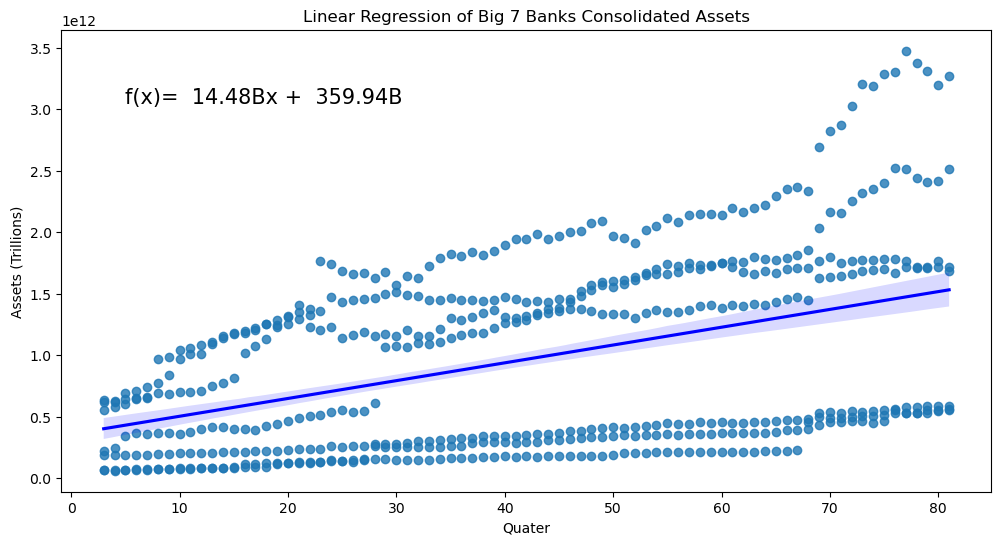

In [467]:
#Initializing the linear regression model
model=LinearRegression()

#Create the linear regression plot using searborn
plt.figure(figsize=(12,6))
sns.regplot(x='Quarter',y='Assets',data=melted_df,line_kws={'color':'b'},order=1)
plt.xlabel('Quater')
plt.ylabel('Assets (Trillions)')
plt.title('Linear Regression of Big 7 Banks Consolidated Assets')
plt.annotate('f(x)=  14.48Bx +  359.94B',xy=(5,3048023790100),xycoords='data',fontsize=15)
plt.show()

In [398]:
#Fit the model to the data
model.fit(melted_df['Quarter'].values.reshape(-1,1),melted_df['Assets'])
m7=model.coef_[0]
b7=model.intercept_

print('m=',m7,'\nb=',b7)



m= 14480237901.655304 
b= 359937179920.7124


In [399]:
#simplify m and b to a billion dollar scale with two decimal places
m7=round(m7/1000000000,2)
b7=round(b7/1000000000,2)
print('m=',m7,'\nb=',b7)

m= 14.48 
b= 359.94


In [396]:
#Display the linear regression equation in billions
print("f(x)= ",m7,'B($)',"x + ",b7,'B($)')

f(x)=  14.48 B($) x +  359.94 B($)


The regression line suggests a positive correlation between the progression of time and the concentration of consolidated assets among the major seven commercial banks in the U.S. 

The operation of the Law of Interpenetration of Opposites: The Law of Monopolization sets the intense competition even among the banks, driving them to towards higher forms of the monopolistic consolidation of their own existance. 

The relationship between time and concentration of banking can be modeled by the following function:

f(x)=  14.48 B x +  359.94 B

This means that big four banks consolidate 14.48 billion dollars every quarter since 2003. 

#### 6b) Linear regression of the biggest 4 banks

In [361]:
#Identifying the Big 4 banks
big_four_banks=['Chase', 'Bank of America', 'Citibank', 'Wells Fargo']
#Melt the Dataframe to combine all bank data points
melted_df_big4=pd.melt(pivot_df_date,id_vars=['Quarter'],value_vars=big_four_banks,var_name='Bank',value_name='Assets')


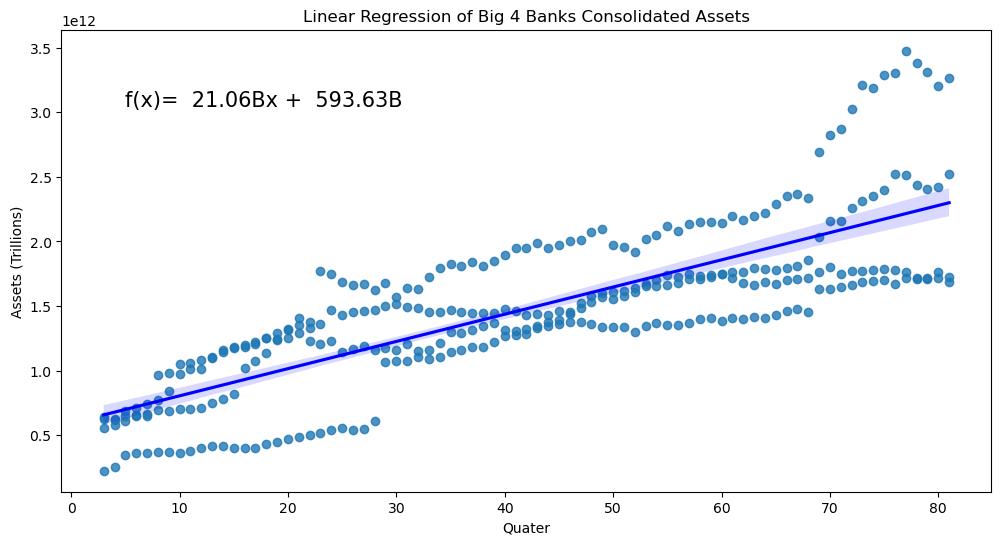

In [449]:
#Initializing the linear regression model
model=LinearRegression()

#Create the linear regression plot using searborn
plt.figure(figsize=(12,6))
sns.regplot(x='Quarter',y='Assets',data=melted_df_big4,line_kws={'color':'b'},order=1)
plt.xlabel('Quater')
plt.ylabel('Assets (Trillions)')
plt.title('Linear Regression of Big 4 Banks Consolidated Assets')
plt.annotate('f(x)=  21.06Bx +  593.63B',xy=(5,3048023790100),xycoords='data',fontsize=15)

plt.show()

In [393]:
#Fit the model to the data
model.fit(melted_df_big4['Quarter'].values.reshape(-1,1),melted_df_big4['Assets'])
m=model.coef_[0]
b=model.intercept_

print('m=',m,'\nb=',b)

m= 21060762767.77021 
b= 593634745399.2207


In [394]:
#simply m and b to a billion dollar scale with two decimal places
m=round(m/1000000000,2)
b=round(b/1000000000,2)
print('m=',m,'\nb=',b)


m= 21.06 
b= 593.63


In [395]:
#Display the linear regression equation in billions
print("f(x)= ",m,'B($)',"x + ",b,'B($)')

f(x)=  21.06 B($) x +  593.63 B($)


The regression line suggests a positive correlation between the progression of time and the concentration of consolidated assets among the major four commercial banks in the U.S. 

The operation of the Law of Interpenetration of Opposites: The Law of Monopolization sets the intense competition even among the banks, driving them to towards higher forms of the monopolistic consolidation of their own existance. 

The relationship between time and concentration of banking can be modeled by the following function:

f(x)=  21.06 B($) x +  593.63 B($)

This means that big four banks consolidate 21.06 billion dollars every quarter since 2003. 